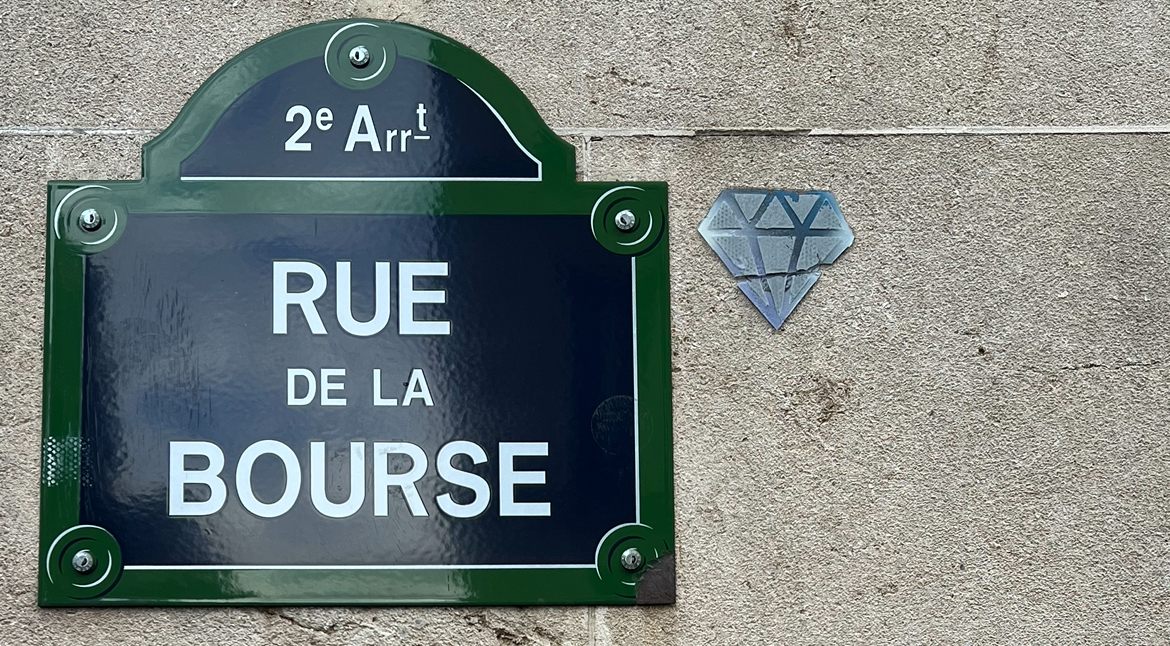

# Analysis of a French stock market index (CAC40)


The following notebook is dedicated to the analysis of CAC40 (fr. *Cotation Assistée en Continu*), the leading benchmark for the French stock market. 

## Plan:

1. Introductory analysis

2. Political investigation: finding the effects of major political events in France on the index

3. Monte Carlo simulation (entire index)

4. Sample portoflio simulation with 5 best performing stocks


**Photo**: *Stock Exchange Street* plate in Paris (Authors's archive)

##### Data extraction

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt
import pandas_datareader as pdr

In [5]:
#All history for CAC40
cac40_hist = yf.download('^FCHI', start = '1987-07-15' , end = dt.datetime.now())
cac40_hist.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-03-01,1836.0,1838.0,1827.0,1832.0,1832.0,0
1990-03-02,1831.0,1860.0,1831.0,1860.0,1860.0,0
1990-03-05,1866.0,1874.0,1862.0,1874.0,1874.0,0
1990-03-06,1869.0,1875.0,1866.0,1872.0,1872.0,0
1990-03-07,1874.0,1881.0,1874.0,1880.0,1880.0,0


In [6]:
#Define lookback window
period = 1000

#Download French CAC40 index data for defined lookback window
cac40 = yf.download('^FCHI', start = dt.datetime.now() - dt.timedelta(days=period), end = dt.datetime.now())
cac40.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-17,6636.700195,6674.370117,6631.629883,6666.259766,6666.259766,70681800
2021-06-18,6657.229980,6687.290039,6560.120117,6569.160156,6569.160156,170613700
2021-06-21,6525.029785,6607.990234,6511.930176,6602.540039,6602.540039,78939300
2021-06-22,6609.979980,6622.200195,6583.500000,6611.500000,6611.500000,65102500
2021-06-23,6616.729980,6619.020020,6551.069824,6551.069824,6551.069824,70376800


In [7]:
#Presidential election period
cac40_election = yf.download('^FCHI', start = '2022-01-01', end = '2022-06-30')

[*********************100%%**********************]  1 of 1 completed


In [8]:
#Pension reform period
cac40_pensions = yf.download('^FCHI', start = '2022-09-01', end = '2023-10-31')

[*********************100%%**********************]  1 of 1 completed


In [9]:
#Covid-19 period
cac40_covid = yf.download('^FCHI', start = '2019-11-01', end = '2021-12-31')

[*********************100%%**********************]  1 of 1 completed


In [10]:
#New PM appointment : Gabriel Attal
cac40_attal = yf.download('^FCHI', start = '2023-12-01', end = dt.datetime.now())

[*********************100%%**********************]  1 of 1 completed


##### Part 1

Text(0, 0.5, '')

<Figure size 800x800 with 0 Axes>

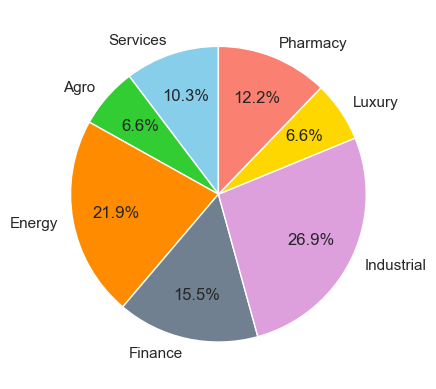

In [11]:
repartition = {'Sector':['Services','Agro','Energy','Finance','Industrial','Luxury','Pharmacy'],
               'Share': [10.3, 6.6, 21.9, 15.5, 26.9,6.6,12.2]}
df = pd.DataFrame(repartition)

colors = ['skyblue','limegreen','darkorange','slategray','plum','gold','salmon']
plt.figure(figsize=(8,8))
df.plot.pie(y='Share', labels=df['Sector'],autopct='%1.1f%%',
            startangle=90, legend=False,colors=colors,pctdistance=0.7)
plt.ylabel(None)

#Source: https://www.economie.gouv.fr/facileco/cac-40

Min on: 1991-01-14 00:00:00
Max on: 2024-03-13 00:00:00


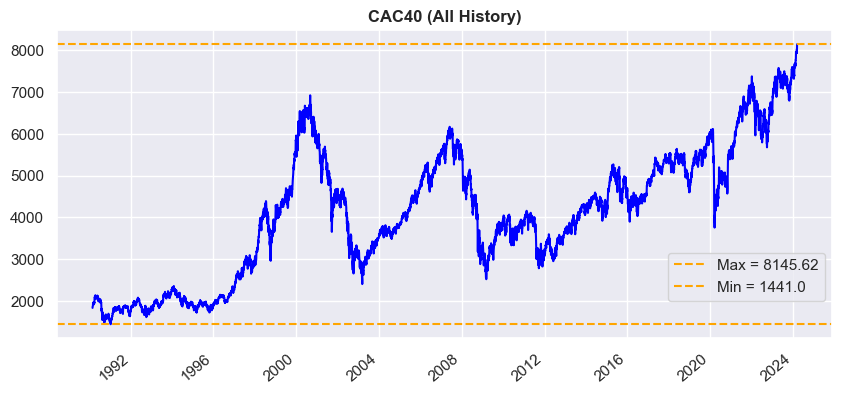

In [13]:
#All history plot
plt.figure(figsize=(10, 4))
plt.xticks(rotation=40, ha='right')
plt.title('CAC40 (All History)',fontweight='bold')
sns.lineplot(data = cac40_hist, x = 'Date', y = 'Close',color='blue')

MIN = round(cac40_hist['Close'].min(),2)
MAX = round(cac40_hist['Close'].max(),2)

plt.axhline(cac40_hist['Close'].max(),linestyle='--',color='orange', label = f'Max = {MAX}')
plt.axhline(cac40_hist['Close'].min(),linestyle='--',color='orange',label=f'Min = {MIN}')

plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc='center right', bbox_to_anchor=(1, 0.2))

print('Min on:', cac40_hist['Close'].idxmin())
print('Max on:', cac40_hist['Close'].idxmax())

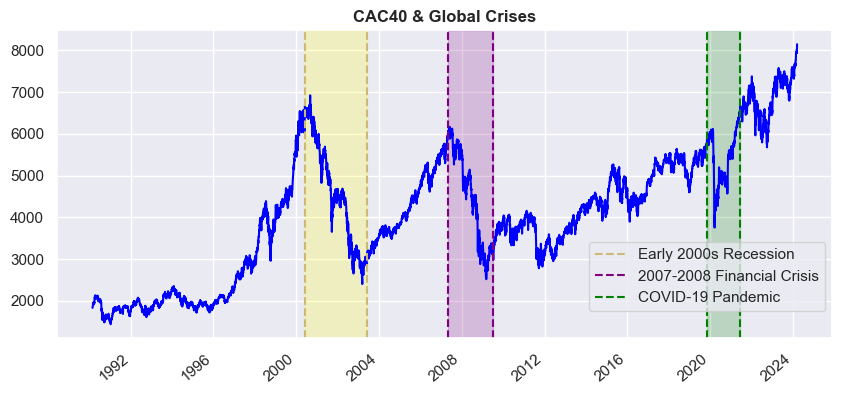

In [14]:
#Global crises plot
plt.figure(figsize=(10, 4))
plt.xticks(rotation=40, ha='right')
plt.title('CAC40 & Global Crises',fontweight='bold')
sns.lineplot(data = cac40_hist, x = 'Date', y = 'Close',color='blue')

plt.axvline(dt.datetime(2000,6,1),linestyle='dashed',color='y',label='Early 2000s Recession')
plt.axvline(dt.datetime(2003,6,1),linestyle='dashed',color='y')
plt.axvline(dt.datetime(2007,5,1),linestyle='dashed',color='purple', label='2007-2008 Financial Crisis')
plt.axvline(dt.datetime(2009,7,1),linestyle='dashed',color='purple')
plt.axvline(dt.datetime(2019,11,1),linestyle='dashed',color='green',label='COVID-19 Pandemic')
plt.axvline(dt.datetime(2021,6,1),linestyle='dashed',color='green')

plt.axvspan(dt.datetime(2000,6,1), dt.datetime(2003,6,1), alpha=0.2, color='yellow')
plt.axvspan(dt.datetime(2007,5,1), dt.datetime(2009,7,1), alpha=0.2, color='purple')
plt.axvspan(dt.datetime(2019,11,1), dt.datetime(2021,6,1), alpha=0.2, color='green')

plt.xlabel(None)
plt.ylabel(None)
plt.legend(loc='center right', bbox_to_anchor=(1, 0.2))

Text(0, 0.5, '')

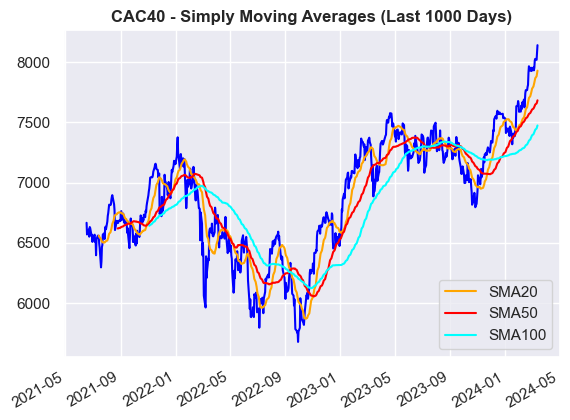

In [15]:
#Moving averages
SMA20 = cac40['Close'].rolling(window = 20, min_periods = 20).mean()
SMA50 = cac40['Close'].rolling(window = 50, min_periods = 50).mean()
SMA100 = cac40['Close'].rolling(window = 100, min_periods = 100).mean()

plt.title(f'CAC40 - Simply Moving Averages (Last {period} Days)',fontweight='bold')
plt.xticks(rotation=40, ha='right')
sns.lineplot(data = cac40, x = 'Date', y = 'Close',color='blue')
SMA20.plot(label='SMA20',color='orange')
SMA50.plot(label='SMA50',color='red')
SMA100.plot(label='SMA100',color='cyan')

plt.legend(loc='lower right')
plt.xlabel(None)
plt.ylabel(None)

In [17]:
#Descriptive statitics
cac40['Close'].describe()

count     706.000000
mean     6879.369399
std       493.243447
min      5676.870117
25%      6535.445068
50%      6927.329834
75%      7267.685181
max      8141.700195
Name: Close, dtype: float64

##### Part 2 : political events and CAC40

Text(0, 0.5, '')

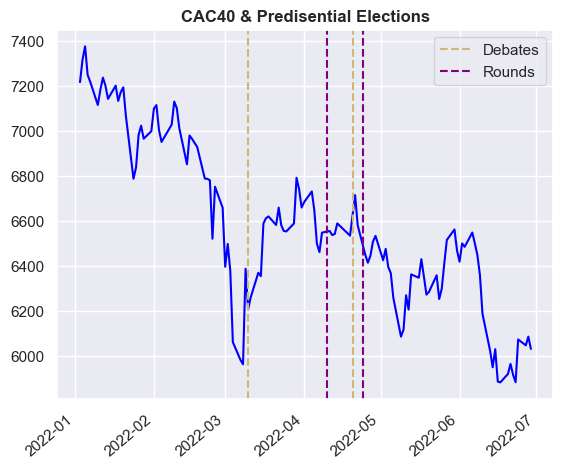

In [18]:
#CAC40 during elections
plt.xticks(rotation=40, ha='right')
plt.title('CAC40 & Predisential Elections',fontweight='bold')
sns.lineplot(data = cac40_election, x = 'Date', y = 'Close',color='blue')

#Debates
plt.axvline(dt.datetime(2022,3,10),linestyle='dashed',color='y',label='Debates')
plt.axvline(dt.datetime(2022,4,20),linestyle='dashed',color='y')

#Rounds
plt.axvline(dt.datetime(2022,4,10),linestyle='dashed',color='purple',label='Rounds')
plt.axvline(dt.datetime(2022,4,24),linestyle='dashed',color='purple')

plt.legend()
plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, '')

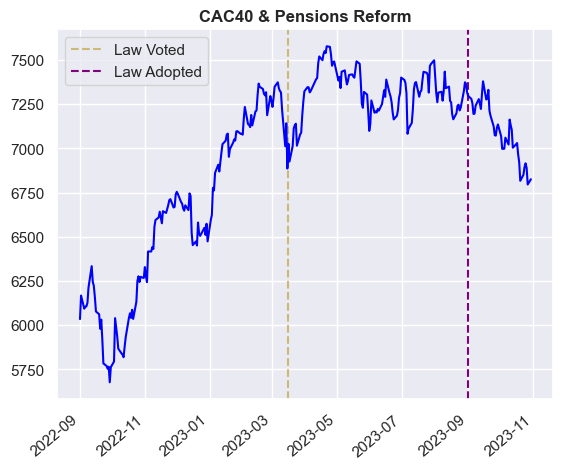

In [19]:
#CAC40 pensions reform
plt.xticks(rotation=40, ha='right')
plt.title('CAC40 & Pensions Reform',fontweight='bold')
plt.axvline(dt.datetime(2023,3,16), linestyle='dashed', color='y',label='Law Voted')
plt.axvline(dt.datetime(2023,9,1), linestyle='dashed',color='purple',label='Law Adopted')
sns.lineplot(data = cac40_pensions, x = 'Date', y = 'Close',color='blue')
plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, '')

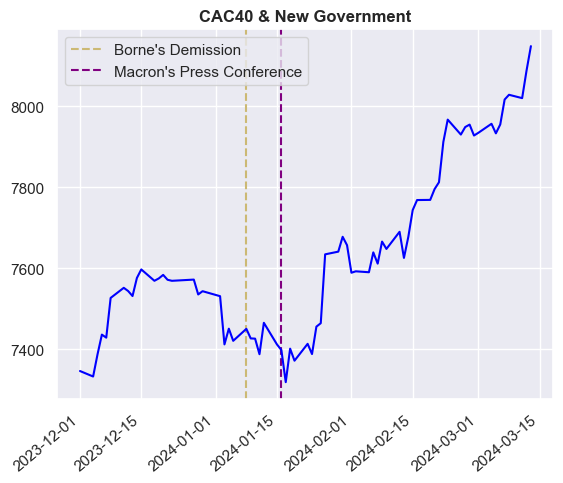

In [20]:
#CAC40 and recent government change
plt.xticks(rotation=40, ha='right')
plt.title('CAC40 & New Government',fontweight='bold')
plt.axvline(dt.datetime(2024,1,8), linestyle='dashed', color='y',label="Borne's Demission")
plt.axvline(dt.datetime(2024,1,16), linestyle='dashed', color='purple',label="Macron's Press Conference")
sns.lineplot(data = cac40_attal, x = 'Date', y = 'Close',color='blue')
plt.xlabel(None)
plt.ylabel(None)

##### Part 3 : MC simulation for CAC40

Text(0, 0.5, '')

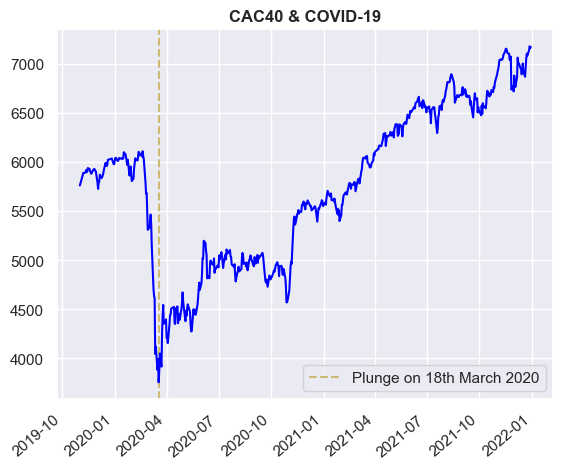

In [22]:
#CAC40 during COVID-19 outbrake
plt.xticks(rotation=40, ha='right')
plt.title('CAC40 & COVID-19',fontweight='bold')
plt.axvline(cac40_covid['Close'].idxmin(),linestyle='dashed',color='y',label='Plunge on 18th March 2020')
sns.lineplot(data = cac40_covid, x = 'Date', y = 'Close',color='blue')
plt.xlabel(None)
plt.ylabel(None)

In [23]:
#Mesures to define sampling distribution
growth = round(cac40['Adj Close'][-1]/cac40['Adj Close'][1],4)
time = (cac40.index[-1] - cac40.index[1])
years = round(time.days/365.0,4)
growth_rate = round(growth**(1/years)-1,4)
std_dev = cac40['Adj Close'].pct_change().std()
trading_days = 256 #Source: https://bourse.lefigaro.fr/actu-conseils/combien-denombre-t-on-de-jours-de-bourse-pendant-une-annee-sur-la-place-de-paris-et-sur-les-autres-marches-d-euronext-20220804
std_dev = round(std_dev * (trading_days**0.5),4)
price = [cac40['Adj Close'][-1]]

<AxesSubplot: >

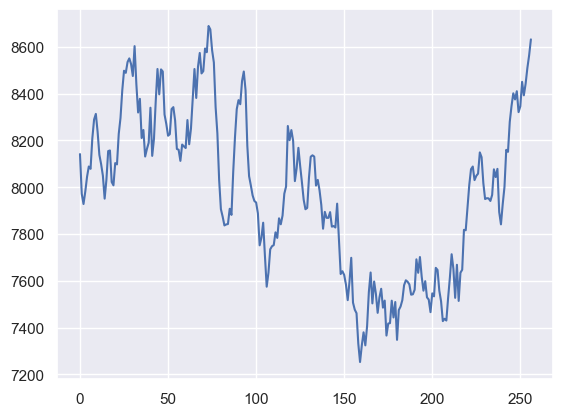

In [24]:
#Single walk MC simulation
daily_return = np.random.normal(growth_rate/trading_days,std_dev/((trading_days)**0.5),trading_days)+1

price = [cac40['Adj Close'][-1]]

for i in daily_return:
    price.append(price[-1]*i)

price = pd.Series(price)
price.plot()

In [25]:
cac40['Adj Close'][-1]

8141.7001953125

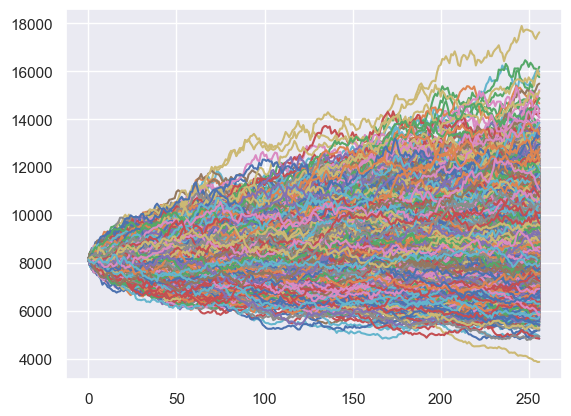

In [26]:
#MC simulation
trials = 5000
closing = []

for i in range(trials):
    daily_returns = np.random.normal(growth_rate/trading_days,std_dev/((trading_days)**0.5),trading_days)+1
    price = [cac40['Adj Close'][-1]]
    for j in daily_returns:
          price.append(price[-1]*j)
    closing.append(price[-1])
    plt.plot(price)

Final score shall fall between 6952.92 and 10867.06 points with 80% probability


Expected score of the index after one trading year: 8838.1552


Expected growth rate: 1.0855


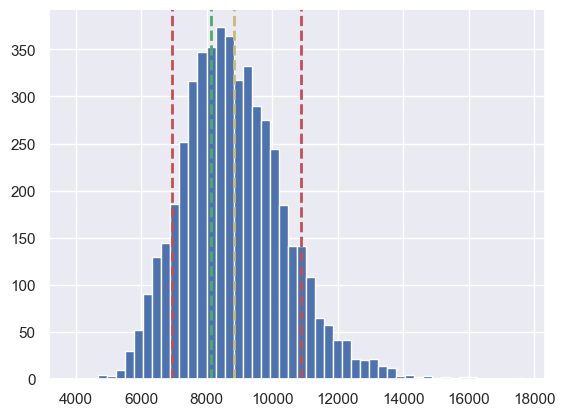

In [27]:
top_ten = np.percentile(closing,100-10)
bottom_ten = np.percentile(closing,10)
ex_price = round(np.mean(closing),4)

plt.hist(closing,bins=50)
plt.axvline(top_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(bottom_ten,color='r',linestyle='dashed',linewidth=2)
plt.axvline(cac40['Adj Close'][-1],color='g', linestyle='dashed',linewidth=2)
plt.axvline(ex_price,color='y',linestyle='dashed',linewidth=2)

print(f'Final score shall fall between {round(bottom_ten,2)} and {round(top_ten,2)} points with 80% probability')
print('\n')
print(f'Expected score of the index after one trading year: {ex_price}')
print('\n')
print(f'Expected growth rate: {round(ex_price/(cac40["Adj Close"][-1]),4)}')

##### Part 4 : MC simulation for sample portfolio

In [28]:
firms = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
firms.head()

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA


In [29]:
Period = 500 #Lookback window

tickers = list(firms['Ticker'])

data = yf.download(tickers, start = dt.datetime.now()- dt.timedelta(days=Period), end = dt.datetime.now())

[*********************100%%**********************]  40 of 40 completed


Text(0.5, 0, '')

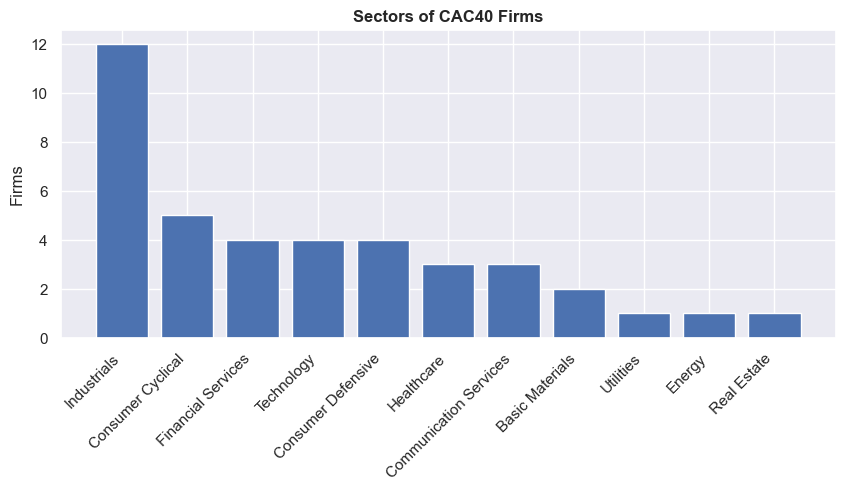

In [30]:
sectors = firms['Sector'].value_counts()
plt.figure(figsize=(10, 4))
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Firms')
plt.title('Sectors of CAC40 Firms', fontweight = 'bold')
plt.bar(sectors.index,sectors.values)
plt.xlabel(None)

In [31]:
sectors

Industrials               12
Consumer Cyclical          5
Financial Services         4
Technology                 4
Consumer Defensive         4
Healthcare                 3
Communication Services     3
Basic Materials            2
Utilities                  1
Energy                     1
Real Estate                1
Name: Sector, dtype: int64

In [35]:
Close = data['Adj Close']
Close.tail()

,ACA.PA,AI.PA,AIR.PA,ALO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,...,SAN.PA,SGO.PA,STLAP.PA,STMPA.PA,SU.PA,TEP.PA,TTE.PA,URW.PA,VIE.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-07,12.804,193.360001,158.339996,12.060,58.880001,58.389999,15.570,226.800003,33.099998,118.879997,...,88.000000,69.220001,25.174999,44.400002,211.300003,85.980003,59.919998,70.320000,29.350000,10.450
2024-03-08,12.774,193.660004,158.059998,12.005,58.750000,58.930000,15.380,225.800003,33.520000,118.540001,...,87.690002,68.550003,25.090000,43.455002,212.050003,86.000000,60.049999,70.879997,29.219999,10.655
2024-03-11,12.882,192.839996,156.800003,11.725,58.970001,59.049999,15.485,224.300003,33.279999,118.639999,...,88.320000,68.150002,25.299999,43.564999,208.449997,85.000000,60.130001,72.059998,29.150000,10.210
2024-03-12,12.942,193.919998,158.000000,12.155,59.160000,59.709999,15.825,225.500000,33.959999,119.080002,...,88.339996,69.519997,25.785000,44.305000,209.250000,84.559998,60.669998,70.680000,28.600000,10.515
2024-03-13,13.022,194.820007,159.399994,11.800,59.459999,61.419998,15.860,224.800003,33.980000,119.919998,...,88.400002,69.709999,25.500000,43.639999,214.100006,84.779999,61.810001,70.680000,28.930000,10.535


<BarContainer object of 40 artists>

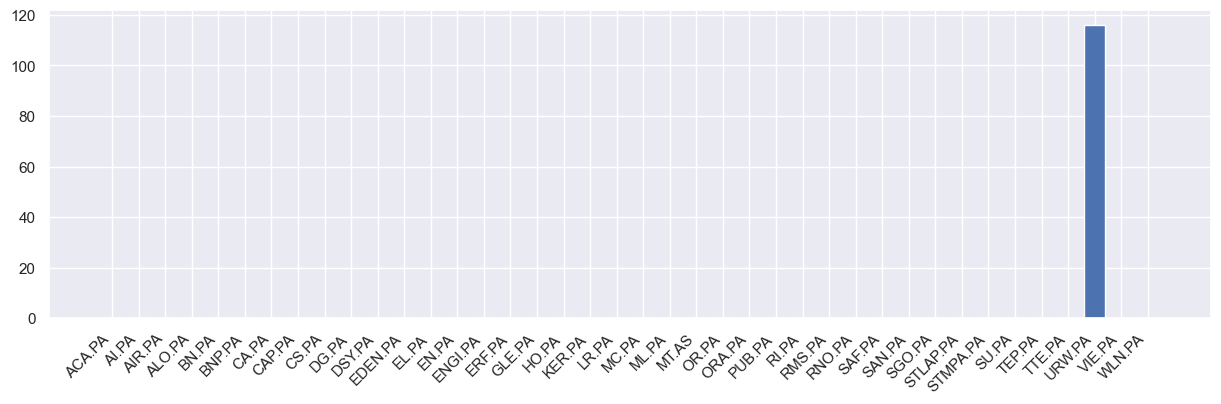

In [33]:
#NULLs
nuls = Close.isnull().sum()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45, ha='right')
plt.bar(nuls.index, nuls.values)

In [41]:
growthRate = Close.iloc[-1,]/Close.iloc[0,]
topGrowth = growthRate.nlargest(5)
top5 = Close[topGrowth.index]
top5.tail()

,STLAP.PA,RMS.PA,SAF.PA,PUB.PA,SGO.PA
Date,,,,,
2024-03-07,25.174999,2315.0,196.619995,96.599998,69.220001
2024-03-08,25.090000,2313.0,195.440002,96.400002,68.550003
2024-03-11,25.299999,2304.5,194.520004,94.480003,68.150002
2024-03-12,25.785000,2331.5,197.919998,95.940002,69.519997
2024-03-13,25.500000,2353.0,198.240005,96.279999,69.709999


<AxesSubplot: title={'center': 'Best Performing Stocks (Closing Price, Last 500 Days)'}, xlabel='Date'>

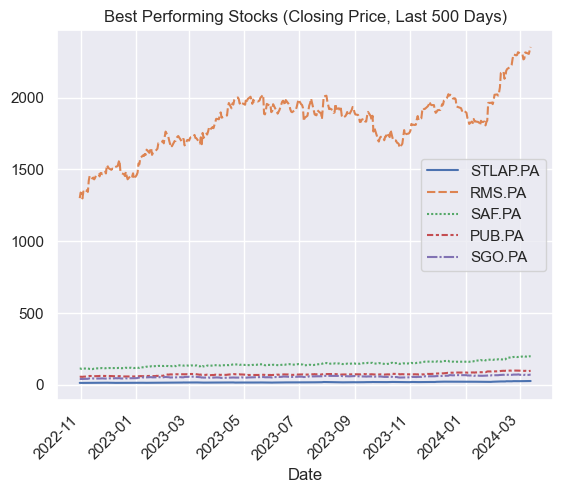

In [43]:
plt.xticks(rotation=45, ha='right')
plt.title(f'Best Performing Stocks (Closing Price, Last {Period} Days)')
sns.lineplot(data = top5[top5.columns])

In [44]:
returns = top5.pct_change()
returns.head()

,STLAP.PA,RMS.PA,SAF.PA,PUB.PA,SGO.PA
Date,,,,,
2022-10-31,NaN,NaN,NaN,NaN,NaN
2022-11-01,0.011287,0.030141,0.006210,0.015862,0.003502
2022-11-02,-0.006523,-0.005555,-0.018339,-0.013879,-0.008665
2022-11-03,-0.030639,-0.025326,0.006646,-0.000352,-0.021731
2022-11-04,0.020921,0.037065,0.013562,0.016895,0.035244


In [45]:
meanReturns = returns.mean()
meanReturns

STLAP.PA    0.002163
RMS.PA      0.001825
SAF.PA      0.001709
PUB.PA      0.001721
SGO.PA      0.001723
dtype: float64

In [46]:
covMatrix = returns.cov()
covMatrix

,STLAP.PA,RMS.PA,SAF.PA,PUB.PA,SGO.PA
STLAP.PA,0.000248,0.000106,0.000072,0.000088,0.000135
RMS.PA,0.000106,0.000257,0.000090,0.000074,0.000115
SAF.PA,0.000072,0.000090,0.000133,0.000061,0.000070
PUB.PA,0.000088,0.000074,0.000061,0.000188,0.000109
SGO.PA,0.000135,0.000115,0.000070,0.000109,0.000258


In [47]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
weights

array([0.20456052, 0.09875972, 0.24155002, 0.20419434, 0.2509354 ])

In [48]:
T = 100 #time horizon for a simulation
sims = 300 #number of MC simulations
portfolioStart = 10000 #initial investment

#We take the average number of trading per year for Euronext 
#Source: https://bourse.lefigaro.fr/actu-conseils/combien-denombre-t-on-de-jours-de-bourse-pendant-une-annee-sur-la-place-de-paris-et-sur-les-autres-marches-d-euronext-20220804

In [49]:
meanMatrix = np.full(shape = (T,len(weights)), fill_value = meanReturns)
meanMatrix = meanMatrix.T

In [50]:
#Matrix for simulation results
portfolioSims = np.full(shape = (T, sims), fill_value = 0.0 )

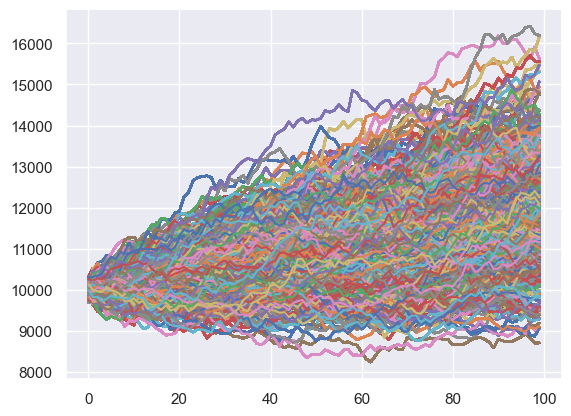

In [52]:
#Run MC simulation for a portfolio
for i in range(0,sims):
    Z = np.random.normal(size = (T,len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanMatrix + np.inner(L,Z)
    portfolioSims[:,i] = np.cumprod(np.inner(weights,dailyReturns.T)+1)*portfolioStart
    plt.plot(portfolioSims)

In [53]:
#Final portofilio values
finalValues = portfolioSims[-1]

After 100 trading days, value of portfolio shall fall between 10460.79 and 13623.18 points with 80% probability


Expected value of portfolio after 100 trading days: 11960.97


Expected ROI: 1.1961


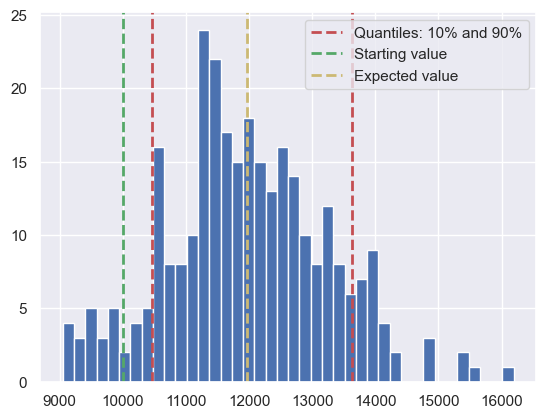

In [54]:
#Distribution of results
TopTen = np.percentile(finalValues,100-10)
BottomTen = np.percentile(finalValues,10)
ExPrice = round(np.mean(finalValues),4)

plt.hist(finalValues,bins=40)
plt.axvline(TopTen,color='r',linestyle='dashed',linewidth=2, label="Quantiles: 10% and 90%")
plt.axvline(BottomTen,color='r',linestyle='dashed',linewidth=2)
plt.axvline(portfolioStart,color='g', linestyle='dashed',linewidth=2, label="Starting value")
plt.axvline(ExPrice,color='y',linestyle='dashed',linewidth=2, label='Expected value')
plt.legend()

print(f'After {T} trading days, value of portfolio shall fall between {round(BottomTen,2)} and {round(TopTen,2)} points with 80% probability')
print('\n')
print(f'Expected value of portfolio after {T} trading days: {round(ExPrice,2)}')
print('\n')
print(f'Expected ROI: {round(ExPrice/portfolioStart,4)}')

In [55]:
last = Close.tail(1)

In [56]:
#The most expensive stock in CAC40
last.loc[:, last.iloc[-1].idxmax()]

Date
2024-03-13    2353.0
Name: RMS.PA, dtype: float64

In [57]:
#The least expensive stock in CAC40
last.loc[:, last.iloc[-1].idxmin()]

Date
2024-03-13    10.446
Name: ORA.PA, dtype: float64